In [2]:
import tensorflow as tf 
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [14]:
EPOCHS = 50

In [15]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    
)

Found 2152 files belonging to 3 classes.


In [3]:
dataset2 = tf.keras.preprocessing.image_dataset_from_directory(
    "BellPepper",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
)

Found 2475 files belonging to 2 classes.


In [5]:
class_names = dataset2.class_names
class_names

['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy']

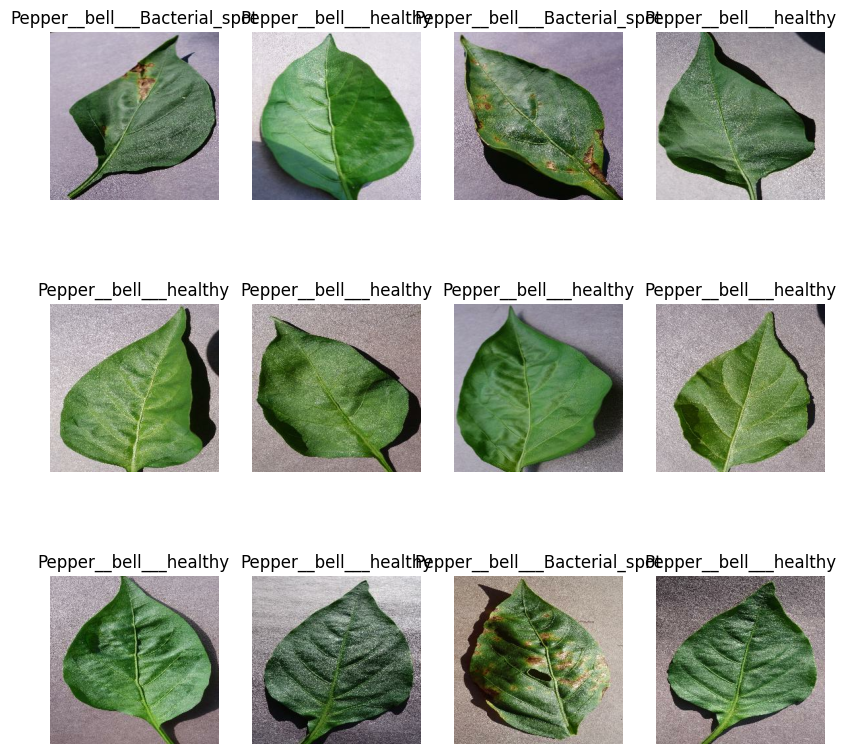

In [6]:
plt.figure(figsize=(10,10))
for image_batch,image_label in dataset2.take(1):
     for i in range(12):
        ax = plt.subplot(3,4, i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[image_label[i]])
        plt.axis("off")

In [7]:
len(dataset2)

78

In [ ]:
"""
80% ==> training
20% ==> 10% validation, 10% test
"""

In [20]:
train_size =0.8
len(dataset)*train_size

54.400000000000006

In [21]:
train_dataset =  dataset.take(54)
len(train_dataset)

54

In [22]:
test_dataset = dataset.skip(54)
len(test_dataset)

14

In [24]:
validation_size = 0.1
len(dataset)*validation_size

6.800000000000001

In [25]:
validation_dataset = test_dataset.take(6)
len(validation_dataset)

6

In [26]:
test_dataset =test_dataset.skip(6)
len(test_dataset)

8

In [1]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split = 0.1,shuffle=True, shuffle_size=10000):
    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size + val_size)
    
    return train_ds, val_ds,test_ds

In [28]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [29]:
len(train_ds)

54

In [30]:
len(val_ds)

6

In [31]:
len(test_ds)

6

In [32]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [33]:
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(256, 256),
    tf.keras.layers.Rescaling(1.0 / 255)
])

In [34]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2)
])

In [35]:
input_shape = (256, 256, 3)  
n_classes = 3  

resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(256, 256),
    layers.Rescaling(1.0 / 255)
], name="resize_and_rescale")

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2)
], name="data_augmentation")


model = models.Sequential([
    tf.keras.layers.InputLayer(shape=input_shape),
    resize_and_rescale,
    data_augmentation,
    tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(n_classes, activation='softmax')  
])

model.build(input_shape=(None, 256, 256, 3))
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resize_and_rescale (Sequential)      │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ data_augmentation (Sequential)       │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
model.compile(
    optimizer = 'adam',
    loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [37]:
history = model.fit(
    train_ds,
    epochs = 50,
    batch_size=32,
    verbose= 1,
    validation_data = val_ds
)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.5168 - loss: 0.9566 - val_accuracy: 0.4688 - val_loss: 0.9122
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.5258 - loss: 0.8528 - val_accuracy: 0.6302 - val_loss: 0.7518
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.7041 - loss: 0.6622 - val_accuracy: 0.7448 - val_loss: 0.5857
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.8421 - loss: 0.3833 - val_accuracy: 0.7135 - val_loss: 0.8158
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.7771 - loss: 0.6778 - val_accuracy: 0.7708 - val_loss: 0.4868
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.8635 - loss: 0.3281 - val_accuracy: 0.8854 - val_loss: 0.2179
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.8707 - loss: 0.3642 - val_accuracy: 0.7083 - val_loss: 1.2298
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.9263 - loss: 0.1928 - val_accuracy: 0.8438 - val_loss:

In [38]:
scores = model.evaluate(test_ds)

6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 367ms/step - accuracy: 0.9436 - loss: 0.1709


In [39]:
scores

[0.1983577162027359, 0.9375]

In [40]:
history

In [41]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [42]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [43]:
history

In [44]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [46]:
len(history.history['accuracy'])

50

In [48]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and validation Accuracy')

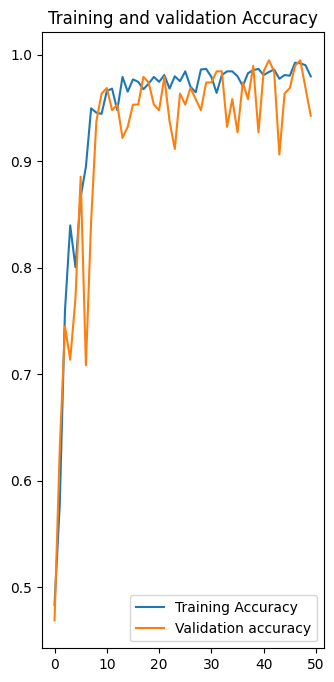

In [49]:
plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label= 'Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label=  'Validation accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and validation Accuracy')

In [62]:
np.argmax([9.9999964e-01,3.9333537e-07,1.1586251e-18])

NameError: name 'np' is not defined

first image to predict
first image label Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
predicted label: Potato___Early_blight


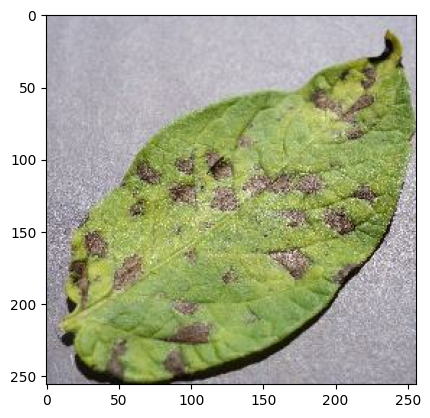

In [66]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0]

    print("first image to predict")
    plt.imshow(first_image)
    print('first image label',class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print('predicted label:', class_names[np.argmax(batch_prediction[0])])
    

In [81]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) 

    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100* (np.argmax(predictions[0])), 2)
    return predicted_class, confidence

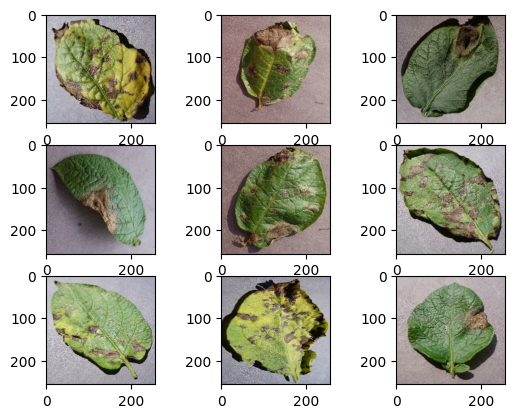

In [70]:
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


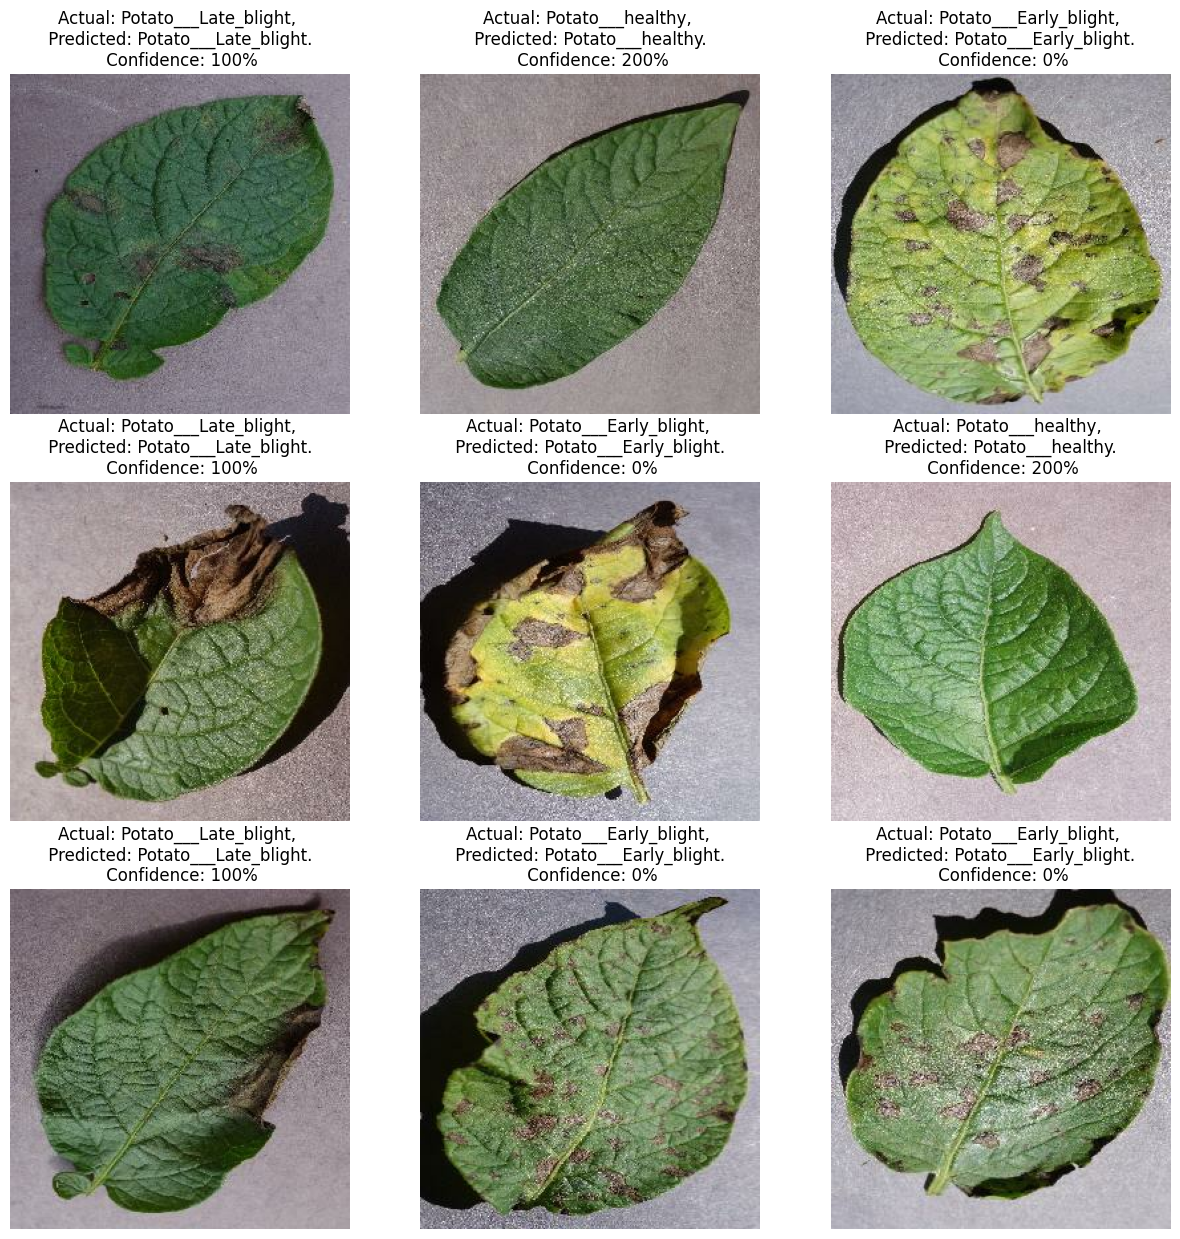

In [87]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))

        predicted_class, confidence = predict(model ,images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class}, \n Predicted: {predicted_class}. \n Confidence: {confidence}%")
        
        plt.axis('off')

In [86]:
model_version =1
model.save(f"../models/{model_version}.keras")

In [9]:
import tensorflow as tf 
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

EPOCHS = 50

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    
)

def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split = 0.1,shuffle=True, shuffle_size=10000):
    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size + val_size)
    
    return train_ds, val_ds,test_ds

train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

input_shape = (256, 256, 3)  
n_classes = 3  

resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(256, 256),
    tf.keras.layers.Rescaling(1.0 / 255)
])

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2)
])

model = models.Sequential([
    tf.keras.layers.InputLayer(shape=input_shape),
    resize_and_rescale,
    data_augmentation,
    tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(n_classes, activation='softmax')  
])

model.build(input_shape=(None, 256, 256, 3))
model.summary()

model.compile(
    optimizer = 'adam',
    loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

history = model.fit(
    train_ds,
    epochs = 50,
    batch_size=32,
    verbose= 1,
    validation_data = val_ds
)

Found 2475 files belonging to 2 classes.


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,682 (717.51 KB)

 Trainable params: 183,682 (717.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 53s 753ms/step - accuracy: 0.6290 - loss: 0.6600 - val_accuracy: 0.8795 - val_loss: 0.4217
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 46s 744ms/step - accuracy: 0.8600 - loss: 0.4218 - val_accuracy: 0.9375 - val_loss: 0.3086
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 47s 752ms/step - accuracy: 0.9214 - loss: 0.2708 - val_accuracy: 0.9688 - val_loss: 0.3244
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 47s 762ms/step - accuracy: 0.9569 - loss: 0.1295 - val_accuracy: 0.9598 - val_loss: 0.1784
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 47s 760ms/step - accuracy: 0.9740 - loss: 0.0820 - val_accuracy: 0.9732 - val_loss: 0.1476
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 51s 818ms/step - accuracy: 0.9877 - loss: 0.0623 - val_accuracy: 0.9866 - val_loss: 0.1346
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 48s 776ms/step - accuracy: 0.9882 - loss: 0.0506 - val_accuracy: 0.9955 - val_loss: 0.0611
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 50s 807ms/step - accuracy: 0.9875 - loss: 0.0567 - val_accu

In [11]:
scores = model.evaluate(test_ds)

9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 240ms/step - accuracy: 0.9955 - loss: 0.0045    


In [ ]:
import tensorflow as tf 
from tensorflow.keras import models, layers, regularizers
import matplotlib.pyplot as plt


EPOCHS = 50

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "BellPepper",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    
)

def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split = 0.1,shuffle=True, shuffle_size=10000):
    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size + val_size)
    
    return train_ds, val_ds,test_ds

train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

input_shape = (256, 256, 3)  
n_classes = 2  

resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(256, 256),
    tf.keras.layers.Rescaling(1.0 / 255)
])

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomContrast(0.2)
])

model = models.Sequential([
    tf.keras.layers.InputLayer(shape=input_shape),
    resize_and_rescale,
    data_augmentation,
   
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.3), 

    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.3), 

    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.4),  

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='softmax')  
])

model.build(input_shape=(None, 256, 256, 3))
model.summary()

model.compile(
    optimizer= tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

history = model.fit(
    train_ds,
    epochs = 50,
    batch_size=32,
    verbose= 1,
    validation_data = val_ds,
    callbacks=[
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
]
)

In [ ]:
import tensorflow as tf 
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

EPOCHS = 50

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "BellPepper",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    
)

training_dataset =  tf.keras.preprocessing.image_dataset_from_directory(
    "train",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    
)

test_dataset =  tf.keras.preprocessing.image_dataset_from_directory(
    "test",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    
)

val_dataset =  tf.keras.preprocessing.image_dataset_from_directory(
    "val",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    
)

def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split = 0.1,shuffle=True, shuffle_size=10000):
    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size + val_size)
    
    return train_ds, val_ds,test_ds

train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

training_dataset = training_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_dataset = val_dataset.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset = test_dataset.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

input_shape = (256, 256, 3)  
n_classes = 2  

resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(256, 256),
    tf.keras.layers.Rescaling(1.0 / 255)
])

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomContrast(0.2),
])

model = models.Sequential([
    tf.keras.layers.InputLayer(shape=input_shape),
    resize_and_rescale,
    data_augmentation,
    tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(n_classes, activation='softmax')  
])

model.build(input_shape=(None, 256, 256, 3))
model.summary()

model.compile(
    optimizer = 'adam',
    loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

history = model.fit(
    train_ds,
    epochs = 50,
    batch_size=32,
    verbose= 1,
    validation_data = val_ds
)

Found 2475 files belonging to 2 classes.
Found 1980 files belonging to 2 classes.
Found 249 files belonging to 2 classes.
Found 247 files belonging to 2 classes.


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)            │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_4 (Sequential)            │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │         802,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 896,258 (3.42 MB)

 Trainable params: 896,258 (3.42 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
50/62 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.6894 - loss: 0.6023 

In [4]:
# Divide the dataset into training 80%, validation, 10% and test 10%
import os
import shutil
import random


main_folder = "BellPepper"  
output_folder = "Output"

train_folder = os.path.join(output_folder, "train")
val_folder = os.path.join(output_folder, "val")
test_folder = os.path.join(output_folder, "test")

categories = ["Pepper__bell___Bacterial_spot", "Pepper__bell___healthy"]


for folder in [train_folder, val_folder, test_folder]:
    for category in categories:
        os.makedirs(os.path.join(folder, category), exist_ok=True)


all_images = []
for category in categories:
    category_path = os.path.join(main_folder, category)

    if not os.path.exists(category_path):
        print(f"Skipping missing category: {category_path}")
        continue

    images = [img for img in os.listdir(category_path) if img.lower().endswith((".jpg", ".png", ".jpeg"))]

    if not images:
        print(f"Warning: No images found in {category_path}")

    all_images.extend([(os.path.join(category_path, img), category) for img in images])


print(f"Total images collected: {len(all_images)}")
if all_images:
    print("Sample image paths:", all_images[:5])  # Show first 5 images for verification


random.shuffle(all_images)

# Split dataset (80% train, 10% validation, 10% test)
total_images = len(all_images)
train_split = int(total_images * 0.8)
val_split = int(total_images * 0.9) 

train_images = all_images[:train_split]
val_images = all_images[train_split:val_split]
test_images = all_images[val_split:]


def copy_images(image_list, dest_folder):
    for img_path, category in image_list:
        dest_path = os.path.join(dest_folder, category, os.path.basename(img_path))
        
        try:
            shutil.copy2(img_path, dest_path)
            print(f"Copied: {img_path} -> {dest_path}") 
        except Exception as e:
            print(f"Failed to copy {img_path}: {e}")

# Copy images into their folders
print("\nCopying images to train folder...")
copy_images(train_images, train_folder)

print("\nCopying images to validation folder...")
copy_images(val_images, val_folder)

print("\nCopying images to test folder...")
copy_images(test_images, test_folder)

print("\nDataset split completed successfully!")


Total images collected: 2475
Sample image paths: [('BellPepper\\Pepper__bell___Bacterial_spot\\0022d6b7-d47c-4ee2-ae9a-392a53f48647___JR_B.Spot 8964.JPG', 'Pepper__bell___Bacterial_spot'), ('BellPepper\\Pepper__bell___Bacterial_spot\\006adb74-934f-448f-a14f-62181742127b___JR_B.Spot 3395.JPG', 'Pepper__bell___Bacterial_spot'), ('BellPepper\\Pepper__bell___Bacterial_spot\\00f2e69a-1e56-412d-8a79-fdce794a17e4___JR_B.Spot 3132.JPG', 'Pepper__bell___Bacterial_spot'), ('BellPepper\\Pepper__bell___Bacterial_spot\\01613cd0-d3cd-4e96-945c-a312002037bf___JR_B.Spot 3262.JPG', 'Pepper__bell___Bacterial_spot'), ('BellPepper\\Pepper__bell___Bacterial_spot\\0169b9ac-07b9-4be1-8b85-da94481f05a4___NREC_B.Spot 9169.JPG', 'Pepper__bell___Bacterial_spot')]

Copying images to train folder...
Copied: BellPepper\Pepper__bell___healthy\7298eb6a-8db7-40dc-9256-aca7772c02af___JR_HL 8739.JPG -> Output\train\Pepper__bell___healthy\7298eb6a-8db7-40dc-9256-aca7772c02af___JR_HL 8739.JPG
Copied: BellPepper\Pepper__be

In [3]:
tf.__version__

NameError: name 'tf' is not defined

In [ ]:
import tensorflow as tf